# So you want to make a killer app?  Can you use data from existing apps to tell whether your app is going to be successful?

# What kind of app should you make?

# In this project, we analyze data from the Google Play App Store.  We will use the Pandas package to make two dataframes from csv files pertaining to app data, and user review data.

# After previewing what data we have to work with, we will ask pertinent questions relating to our data, use Pandas to answer those questions, and finally Matplotlib and WordCloud to visualize our findings.

In [1]:
# We first import the common packages relevant to data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We will also use the WordCloud function from the WordCloud package to visualize review data later in the project.
from wordcloud import WordCloud

In [2]:
# This creates dataframes from the csv files holding the data we are analyzing.
app_data = pd.read_csv("Data/google-play-store-apps/googleplaystore.csv")
review_data = pd.read_csv("Data/google-play-store-apps/googleplaystore_user_reviews.csv")

In [3]:
# We use the .head() method to preview what data the app_data dataframe contains.
app_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
# We use the .head() method to preview what data the review_data dataframe contains.
review_data.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


# After seeing the data we have available, we are left with the following questions:

# 1. How well-recieved is each app category; that is, what is the mean rating for each category of apps?
# 2. How populous is each category; that is, which category has the most apps?
# 3. How often is each category of apps installed; that is, what is the total number of installations per category?
# 4. Are there any relationships between mean-rating, number of apps, and total downloads by category?
# 5. Given a list of words of interest, which word appears most often in written reviews?
# 6. Given a list of words of interest, which other words appear in reviews where the word of interest appears?
# 7. Given a list of words of interest, what percentage of reviews with each word of interest have a positive, negative, and neutral sentiment?

## Before we proceed with our analysis, we will look for any limitations our data may have.

In [5]:
# In the following lines, we check the shape of both dataframes using the .shape method, as well as the number of entries in each column using the .count() method.
# By doing so, we check for missing data.
print("app_data:")
print(app_data.shape)
print(app_data.count())
print("\nreview_data:")
print(review_data.shape)
print(review_data.count())

app_data:
(10841, 13)
App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

review_data:
(64295, 5)
App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64


## We notice that our app_data dataframe has 10,841 rows, yet several columns do not have this many entries.  We also notice that our review_data dataframe has 64,295 rows, yet most columns only have approximately half as many entries.  Before we proceed, we will create a subset of our dataframes using only rows with complete data.

In [6]:
# By using the .dropna method, we drop any rows which have missing data.
app_data_no_na = app_data.dropna(how="any")
review_data_no_na = review_data.dropna(how="any")

In [7]:
# In the following lines, we check the shape of both dataframes using the .shape method, as well as the number of entries in each column using the .count() method.
# By doing so, we confirm that the subsets we are using only contain rows with complete data.
print("App Data:")
print(app_data_no_na.shape)
print(app_data_no_na.count())
print("\nReview Data")
print(review_data_no_na.shape)
print(review_data_no_na.count())

App Data:
(9360, 13)
App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

Review Data
(37427, 5)
App                       37427
Translated_Review         37427
Sentiment                 37427
Sentiment_Polarity        37427
Sentiment_Subjectivity    37427
dtype: int64


## How well-recieved is each app category; that is, what is the mean rating for each category of apps?

In [44]:
# Here we group the app_data dataframe by category, then find the mean of the Rating column.
# This gives us a series of means which we store in the variable "average_rating_by_category."
average_rating_by_category = app_data_no_na.groupby("Category", sort=True)["Rating"].mean()

# We use the .index method on average_rating_by_category to make an array which lists every category in alphabetical order.
# We sorted the average_rating_by_category in alphabetical order.
# Therefore, even though we are using an array of mean ratings to create an array of categories, we may reuse the category variable with arrays of other calculations. 
categories = average_rating_by_category.index

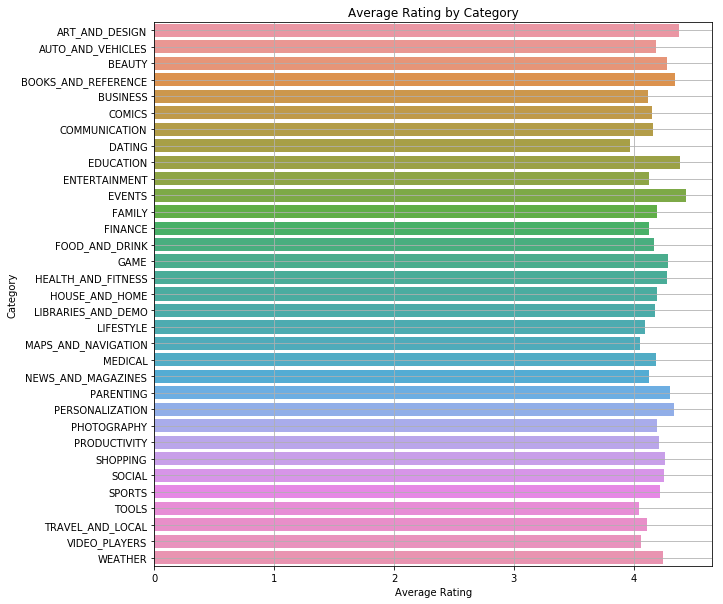

In [45]:
# Here we use the seaborn package to create a bar chart showing the average rating by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))
# We change the orientation to horizontal by using the orient=h parameter.
# This improves readability of the chart.
sns.barplot(average_rating_by_category, categories, orient="h")
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.grid()
plt.show()

### At this stage it is difficult to tell the difference between the mean rating for each category.  We will sort the categories in ascending order by rating.

In [46]:
# We use the sort_values() method to sort the values in our average_rating_by_category variable.
average_rating_by_category_sorted = average_rating_by_category.sort_values()

# Our categories are currently in alphabetical order.
# We use the .index method on our average_rating_by_category_sorted variable to create a new variable holding the category names in order according to their rating mean.
categories_sorted_by_average_rating = average_rating_by_category_sorted.index

### We also notice that no category has a mean less than 3, yet our x-axis starts at 0.  Furthermore, the x-axis greatly exceeds the highest mean value.  We will therefore determine the lowest as well as the highest value, so that we can define a more appropriate x-axis.

In [48]:
# We print the first record from the average_rating_by_category_sorted so that we can see the value of the lowest mean.
print(average_rating_by_category_sorted.head(1))

# We use the .nlargest() method on our average_rating_by_category_sorted list to see the value of the single highest mean.
print(average_rating_by_category_sorted.nlargest(1))

Category
DATING    3.970769
Name: Rating, dtype: float64
Category
EVENTS    4.435556
Name: Rating, dtype: float64


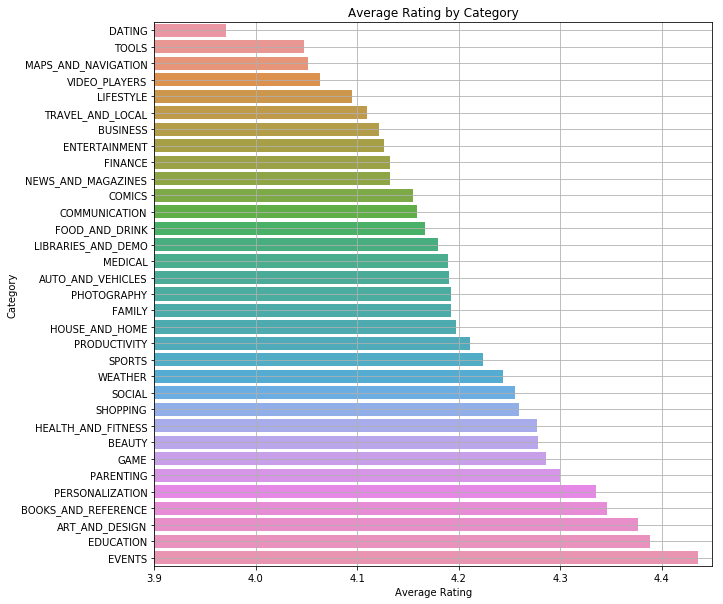

In [49]:
# We use the seaborn package to replot the average rating by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))
# This time, we use our sorted-variables, to produce an easier-to-read chart.
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
# Based on the lowest- and highest-valued means, we redfine the x-axis to further improve chart readability.
bar_chart_average_rating_by_category.set(xlim=(3.9,4.45))
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.grid()
plt.show()

## How populous is each category; that is, which category has the most apps?

In [22]:
# Here we group our dataframe by the Category column, and use the count() function on the App column.
# This gives us a series of the number of apps per category, which we store in the variable number_of_apps_by_category.
number_of_apps_by_category = app_data_no_na.groupby("Category", sort=True)["App"].count()

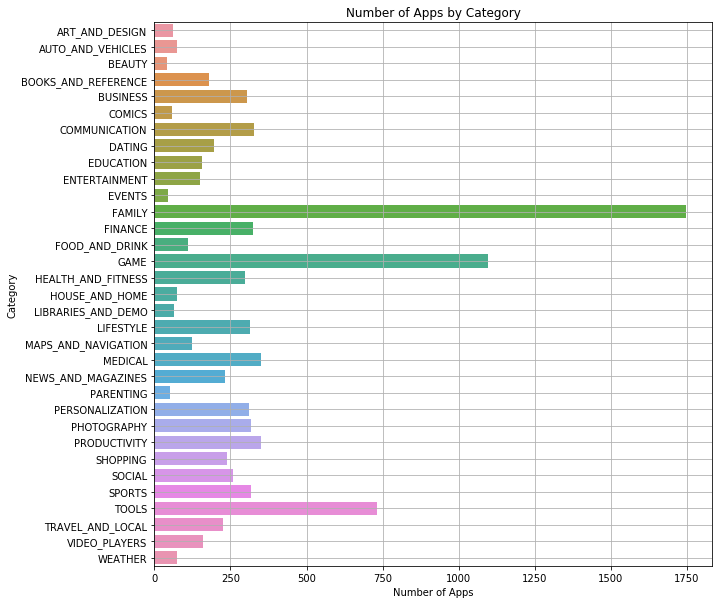

In [50]:
# We use seaborn to plot the total number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

sns.barplot(number_of_apps_by_category, categories)
plt.title("Number of Apps by Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.grid()

### As with our first graph, it is difficult to compare each category with this format.  We will therefore sort the categories in ascending order according to the number of apps.

In [51]:
# We use the sort_values() method to sort the values in our number_of_apps_by_category variable.
number_of_apps_by_category_sorted = number_of_apps_by_category.sort_values()

# Our categories are currently in alphabetical order.
# We use the .index method on our number_of_apps_by_category_sorted variable to create a new variable holding the category names in order according to the number of apps.
categories_sorted_by_number_of_apps = number_of_apps_by_category_sorted.index

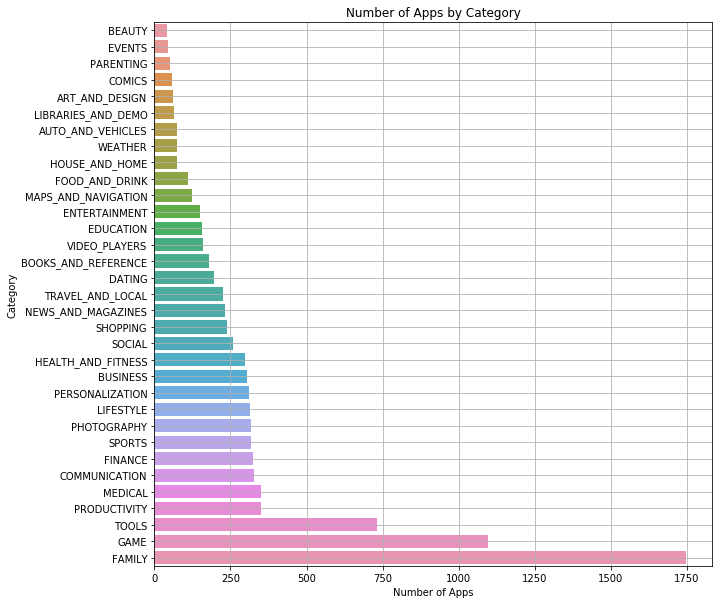

In [52]:
# We use seaborn to plot the number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

# This time, we use our sorted-variables, to produce an easier-to-read chart.
sns.barplot(number_of_apps_by_category_sorted, categories_sorted_by_number_of_apps)
plt.title("Number of Apps by Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.grid()

## How often is each category of apps installed; that is, what is the total number of installations per category?

### Before we proceed, we will look at the dataframe containing the app data.

In [53]:
app_data_no_na.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


### We notice that the entries in the Installs column are not numeric values.  We are not able to perform numeric calculations on Installs until we have a reformated column.

In [54]:
# We use the .nunique() method to show us the number of values in the Installs column that we must replace.
app_data_no_na["Installs"].nunique()

19

In [55]:
# We use the .unique() method to show us a list of unique values in this column.
# We will have to replace each value in this list with a number that does not include the "+" sign.
app_data_no_na["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [56]:
# We define a new column in our app_data_no_na dataframe that consists of reformatted values from the Installs column.
# We use the .replace() method to replace a string consisting of a number with a "+" sign, with just the number.
app_data_no_na["Installs Numeric"] = app_data["Installs"].replace({"10,000+":10000,
                                                                  "500,000+":500000,
                                                                  "5,000,000+":5000000,
                                                                  "50,000,000+":50000000,
                                                                  "100,000+":100000,
                                                                  "50,000+":50000,
                                                                  "1,000,000+":1000000,
                                                                  "10,000,000+":10000000,
                                                                  "5,000+":5000,
                                                                  "100,000,000+":100000000,
                                                                  "1,000,000,000+":1000000000,
                                                                   "1,000+":1000,
                                                                   "500,000,000+":500000000,
                                                                   "100+":100,
                                                                   "500+":500,
                                                                   "10+":10,
                                                                   "5+":5,
                                                                   "50+":50,
                                                                   "1+":1})

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
# We use the .nunique() method on the Installs Numeric column to confirm it has the same number of unique value as the pre-formatted Installs column.
app_data_no_na["Installs Numeric"].nunique()

19

In [58]:
# We also use the .unique() method on the Installs Numeric column to check for any non-numeric values.
app_data_no_na["Installs Numeric"].unique()

array([10000, 500000, 5000000, 50000000, 100000, 50000, 1000000, 10000000,
       5000, 100000000, 1000000000, 1000, 500000000, 100, 500, 10, 5, 50,
       1], dtype=object)

In [59]:
# Here we group our dataframe by the Category column, and use the sum() function on the Installs Numeric column.
# This gives us a series of the total number of installations per category, which we store in the variable total_installs_by_category.
total_installs_by_category = app_data_no_na.groupby("Category", sort=True)["Installs Numeric"].sum()

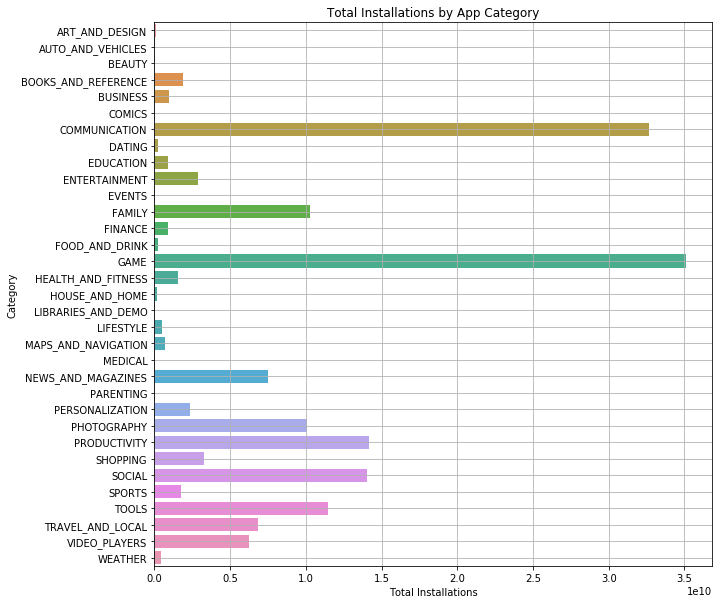

In [70]:
# We use seaborn to plot the total number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))

sns.barplot(total_installs_by_category, categories, orient="h")
plt.title("Total Installations by App Category")
plt.xlabel("Total Installations")
plt.ylabel("Category")
plt.grid()
plt.show()

### Like before, it is difficult to compare each category with this format.  We will therefore sort the categories in ascending order according to the number of installations by category.

In [61]:
# We use the sort_values() method to sort the values in our average_rating_by_category variable.
total_installs_by_category_sorted = total_installs_by_category.sort_values()

# Our categories are currently in alphabetical order.
# We use the .index method on our total_installs_by_category_sorted variable to create a new variable holding the category names in order according to the total number of installations.
categories_sorted_by_total_installs = total_installs_by_category_sorted.index

### We also notice that several app categories have so few installations, that we can't even see a bar on our plot.  We will therefore determine the lowest as well as the highest value, so that we can define a more appropriate x-axis.

In [62]:
# We print the first record from the average_rating_by_category_sorted so that we can see the value of the lowest mean.
print(total_installs_by_category_sorted.head(1))
# We use the .nlargest() method on our average_rating_by_category_sorted list to see the value of the single highest mean.
print(total_installs_by_category_sorted.nlargest(1))

Category
EVENTS    15949410
Name: Installs Numeric, dtype: int64
Category
GAME    35085862717
Name: Installs Numeric, dtype: int64


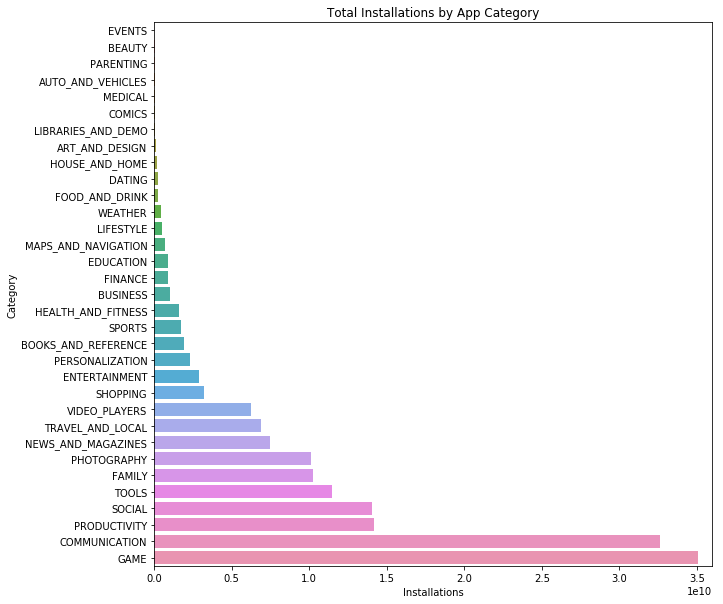

In [71]:
# We use seaborn to plot the number of apps by category.

# By using the figsize parameter of the subplots function, we change our chart to a more appropriate size.
plt.subplots(figsize=(10,10))
# This time, we use our sorted-variables, to produce an easier-to-read chart.
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
# Based on the lowest- and highest-valued means, we redfine the x-axis to further improve chart readability.
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installations by App Category")
plt.xlabel("Installations")
plt.ylabel("Category")
plt.show()

## We will now view the three previous graphs all at once for category analysis.

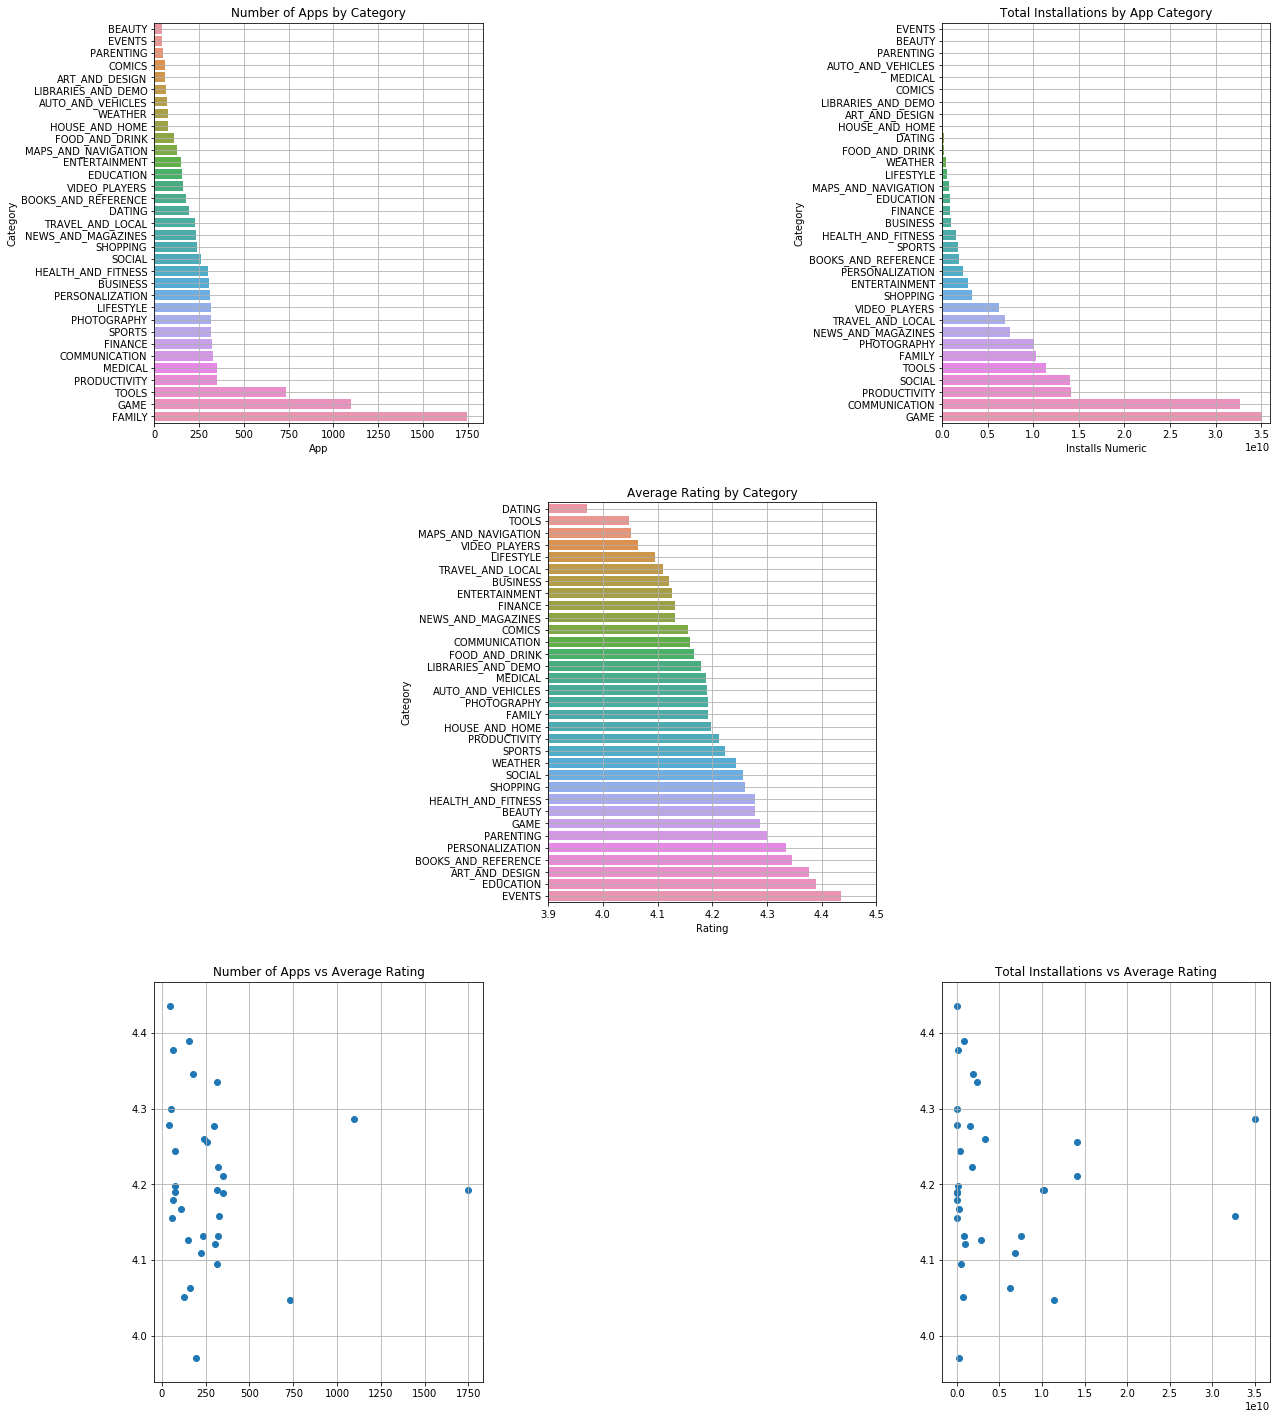

In [72]:
plt.subplots(figsize=(20,25))

# By using the subplot function, we graph multiple graphs at once.
# We define a plot with two row and three columns.
# We will position two graphs on the top row; one to the left, and one to the right.  We will put the third graph on the bottom row in the middle.
# This improves readability, as the graphs would overlap if they were all one row.
plt.subplot(3,3,1)
bar_chart_average_rating_by_category = sns.barplot(number_of_apps_by_category_sorted, categories_sorted_by_number_of_apps, orient="h")
plt.title("Number of Apps by Category")
plt.grid()

plt.subplot(3,3,3)
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installations by App Category")
plt.grid()

plt.subplot(3,3,5)
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
plt.title("Average Rating by Category")
bar_chart_average_rating_by_category.set(xlim=(3.9,4.5))
plt.grid()

plt.subplot(3,3,7)
plt.scatter(number_of_apps_by_category, average_rating_by_category)
plt.title("Number of Apps vs Average Rating")
plt.grid()

plt.subplot(3,3,9)
plt.scatter(total_installs_by_category, average_rating_by_category)
plt.title("Total Installations vs Average Rating")
plt.grid()

## 5. Given a list of words of interest, which word appears most often in written reviews?

In [ ]:
review_data.head(2)

In [ ]:
# The words of interest variable will hold a list of words which we will use to form a word cloud.
words_of_interest = []

# We dynamically add the words that make up our list, and therefore the length thereof.
# We continue to add words to our list until the the stop_continue variable is set to stop.
stop_continue = "continue"
while stop_continue == "continue":
    # Using a while-loop, we dynamically choose words of interest.
    word_of_interest = input("Which word of interest would you like to search for? ")
    # The word of interest is then added to the words_of_interest list.
    words_of_interest.append(word_of_interest)
    print(f"Your words of interest are: {words_of_interest}")
    user_answer = input("\nWould you like to add another word of interest?\nType in the word \"stop\" to exit the process.\nOtherwise hit any key to continue. ")
    
    # When we decide top stop adding words of interest to our list, we change the value of stop_continue to stop and exit the while-loop.
    if user_answer == user_answer.lower() == "stop":
        stop_continue = "stop"
        
print(f"Your words of interest are: {words_of_interest}")

In [ ]:
"""
There are two methods for forming a word cloud.
The program can either form a word cloud composed only of words in our words_of_interest list,
or extract every word that appears in the same review as one with one of our words of interest.
In the second method, any word found often enough will appear in our word cloud.
"""

# The method_selection variable will hold an integer- either 1 or 2, and will be used with if-statements to tell the program which method to use.
method_selection = input("This program has two methods for forming word clouds.\nIn both methods the program will search each review for all words of interest.\nIf the word of interest is found in a review at least once, the program will then:\n1. Add only that word of interest to a list, then create a word cloud showing the frequency of words of interest. \n2. Extract every word from that review, to display other words that appear with words of interest.\nPlease enter 1 to use the first method, or 2 to use the second method. ")

# By using a try-except clause, we dynamically select which method we want to use, while also preventing our program from crashing from invalid input.
try:
    # If the method_selection variable defined earlier is equal to 1, the program will form a word cloud using the first method.
    if int(method_selection) == 1:

        # We define the string variable frequency_words_as_string.
        # We will loop through every entry in the Translated_Review column.
        # If our word of interest is found in a review, it will be concatenated to our string variable frequency_words_as_string.
        frequency_words_as_string = ""
        
        # We will loop through every word in our words_of_interest list,
        # and for each word, we define another loop to search for that word in each review from the Translated_Review column.
        for word in words_of_interest:
            for review in review_data["Translated_Review"]:
                # If our word of interest appears in the current review, the program will concatenate the word to our string frequency_words_as_string.
                # We use the WordCLoud function from the wordcloud package.
                # This function displays the frequency of words in a string.
                # Therefore we add a space between each word, so that the WordCloud function can tell where one word ends and another word starts.
                if str(word) in str(review):  
                    frequency_words_as_string += " " + str(word)

        # We define the wordcloud using the WordCloud function.
        # We generate the word cloud using our frequency_words_as_string variable.
        wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white").generate(frequency_words_as_string)
        # The imshow function and the interpolation parameter are used to give our wordcloud a higher definiton appearance.
        plt.imshow(wordcloud, interpolation="mitchell")
        # We turn the axis off, as it is irrelevant to the data in our word cloud.
        plt.axis("off")

    # If the method_selection variable defined earlier is equal to 2, the program will form a word cloud using the second method.    
    elif int(method_selection) == 2:
        
        # We define the string variable review_words.
        # We will loop through every entry in the Translated_Review column.
        # If our word of interest is found in a review, it will be concatenated to our string variable review_words.
        review_words = ""

        # We will loop through every word in our words_of_interest list,
        # and for each word, we define another loop to search for that word in each review from the Translated_Review column.
        for word in words_of_interest:
            for review in review_data["Translated_Review"]:
                # If our word of interest is found in a review, the entire review will be concatenated to our string variable review_words.
                # More importantly, every word of the review will be concatenated to our string review_words.
                # We use the WordCLoud function from the wordcloud package.
                # This function displays the frequency of words in a string.
                # Therefore we add a space between each review, so that the WordCloud function can tell where the last word from one review ends and the first word from another review starts.
                if word in str(review):
                    review_words += " " + str(review)

        # We define the wordcloud using the WordCloud function.
        # We generate the word cloud using our review_words variable.
        wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white" ).generate(review_words)
         # The imshow function and the interpolation parameter, are used to give our wordcloud a higher definiton appearance.
        plt.imshow(wordcloud, interpolation="mitchell")
        # We turn the axis off, as it is irrelevant to the data in our word cloud.
        plt.axis("off")
        
    else:
        print("It appears you gave an invalid input.  Please try again.")

except:
    print("It appears you gave an invalid input.  Please try again.")

# 7. Given a list of words of interest, what percentage of reviews with each word of interest have a positive, negative, and neutral sentiment?

## Before we show what percentage of apps have a positive, negative, and neutral sentiment grouped by keywords, we will determine the percentages for every app review, regardless of words of interest.

In [ ]:
# We define three lists, one for each type of sentiment.
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# We will loop through every value in the Sentiment column, and append the sentiment as a string to the appropriate list.
# We will then find the length of each list, and divide that by the length of the entire Sentiments column, so that we will have the percentage of review with each sentiment.
for sentiment in review_data_no_na["Sentiment"]:
    if sentiment == "Positive":
        positive_sentiments.append(sentiment)
    elif sentiment == "Negative":
        negative_sentiments.append(sentiment)
    elif sentiment == "Neutral":
        neutral_sentiments.append(sentiment)

# We get the length of the entire Sentiment column, and store this in the variable number_of_reviews_with_sentiment.
number_of_reviews_with_sentiment = len(review_data_no_na["Sentiment"])

# We divide the length of each list of specific sentiment type by the length of the entire list of sentiments, to return the percentage of reviews with each type of sentiment.
percent_positive = len(positive_sentiments) / number_of_reviews_with_sentiment
percent_neutral = len(neutral_sentiments) / number_of_reviews_with_sentiment
percent_negative = len(negative_sentiments) / number_of_reviews_with_sentiment

# We make a bar chart with a bar for each of our three types of sentiment.
plt.bar(1,percent_positive, label="positive", color="green")
plt.bar(2, percent_negative, label="negative", color="red")
plt.bar(3, percent_neutral, label="neutral", color="yellow")
plt.title("Percentage of All App Reviews by Sentiment")
plt.legend(loc="best")

In [ ]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for word_of_interest in words_of_interest:
    for row in review_data["Review with Sentiment"]:
        if str(word_of_interest) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(word_of_interest) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = 100*(len(positive_sentiments) / number_reviews_with_keyword)
percent_neutral = 100*(len(neutral_sentiments) / number_reviews_with_keyword)
percent_negative = 100*(len(negative_sentiments) / number_reviews_with_keyword)

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of Apps by Sentiment with Word of Interest: {word_of_interest}")
plt.legend(loc="best")

In [ ]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for word_of_interest in words_of_interest:
    for row in review_data["Review with Sentiment"]:
        if str(word_of_interest) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(word_of_interest) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = 100*(len(positive_sentiments) / number_reviews_with_keyword)
percent_neutral = 100*(len(neutral_sentiments) / number_reviews_with_keyword)
percent_negative = 100*(len(negative_sentiments) / number_reviews_with_keyword)

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of Apps by Sentiment with Word of Interest: {word_of_interest}")
plt.legend(loc="best")

In [ ]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for word_of_interest in words_of_interest:
    for row in review_data["Review with Sentiment"]:
        if str(word_of_interest) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(word_of_interest) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = 100*(len(positive_sentiments) / number_reviews_with_keyword)
percent_neutral = 100*(len(neutral_sentiments) / number_reviews_with_keyword)
percent_negative = 100*(len(negative_sentiments) / number_reviews_with_keyword)

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of Apps by Sentiment with Word of Interest: {word_of_interest}")
plt.legend(loc="best")

In [ ]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for word_of_interest in words_of_interest:
    for row in review_data["Review with Sentiment"]:
        if str(word_of_interest) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(word_of_interest) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = 100*(len(positive_sentiments) / number_reviews_with_keyword)
percent_neutral = 100*(len(neutral_sentiments) / number_reviews_with_keyword)
percent_negative = 100*(len(negative_sentiments) / number_reviews_with_keyword)

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of Apps by Sentiment with Word of Interest: {word_of_interest}")
plt.legend(loc="best")

In [ ]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for word_of_interest in words_of_interest:
    for row in review_data["Review with Sentiment"]:
        if str(word_of_interest) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(word_of_interest) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = 100*(len(positive_sentiments) / number_reviews_with_keyword)
percent_neutral = 100*(len(neutral_sentiments) / number_reviews_with_keyword)
percent_negative = 100*(len(negative_sentiments) / number_reviews_with_keyword)

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of Apps by Sentiment with Word of Interest: {word_of_interest}")
plt.legend(loc="best")